In [62]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [63]:
# 한글 폰트 설정

# mac에서
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')  # 애플고딕 사용
plt.rcParams['axes.unicode_minus'] = False

# windows에서
# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 사용
# plt.rcParams['axes.unicode_minus'] = False


In [64]:
# CSV 파일 불러오기
df = pd.read_csv('data_for_clustering.csv')

# 변수 목록
feature_cols = [
    '평균 상가 임대료', '월_평균_소득_금액',
    '출생현황(16~25)', '연령별 등록 인구 (0~9세)',
    'Cctv 개수', '어린이집 개수',
    '지하철역 개수', '정류장 개수'
]

In [65]:
# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])
scaled_df = pd.DataFrame(scaled_features, columns=feature_cols)
scaled_df['행정구역'] = df['행정구역']
scaled_df


,평균 상가 임대료,월_평균_소득_금액,출생현황(16~25),연령별 등록 인구 (0~9세),Cctv 개수,어린이집 개수,지하철역 개수,정류장 개수,행정구역
0,1.044567,2.776940,0.438204,2.597266,-0.197291,1.605632,-0.476731,2.482932,광장동
1,-0.672936,-0.455624,0.024198,-0.291480,0.195750,-0.944490,-0.476731,-0.878438,구의1동
2,0.017011,-0.126721,0.426861,0.541148,1.328631,0.897265,-0.476731,0.062746,구의2동
3,0.983983,1.194041,1.688729,0.970187,0.057029,0.755592,-0.476731,0.466110,구의3동
4,-0.351626,-0.554018,-0.755608,-0.520544,0.819990,0.472245,0.953463,0.331655,군자동
5,1.057492,-0.253875,-1.132751,-0.993215,-1.468893,-1.652857,2.383656,-1.416257,능동
6,-0.795720,-0.378207,-0.389808,-0.555085,-0.890892,0.755592,-1.906925,-0.878438,자양1동
7,-0.900828,-0.063476,0.704756,0.306630,0.334470,0.613918,-0.476731,-0.609528,자양2동
8,0.953477,1.619653,1.941102,1.508305,-1.307052,0.188898,0.953463,-0.475074,자양3동
9,0.314848,-0.317124,-0.894556,-0.329658,0.334470,-0.377796,0.953463,-0.878438,자양4동


DBSCAN: 유효한 군집이 2개 이상 형성되지 않아 실루엣 점수 계산 불가
GMM 실루엣 점수: 0.28204328854357114
Agglomerative Clustering 실루엣 점수: 0.24747387617505695
KMeans 실루엣 점수: 0.28204328854357114


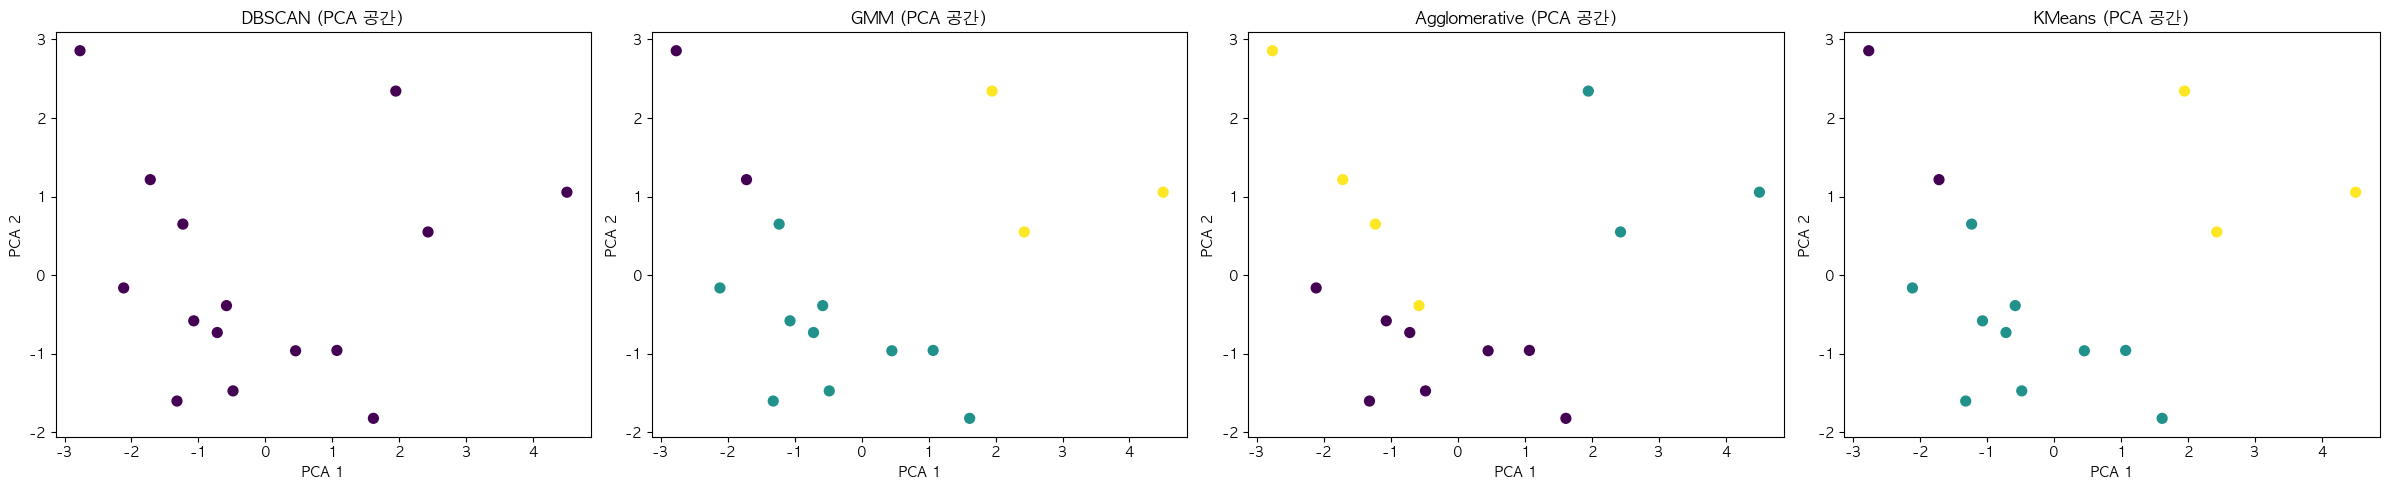

In [66]:
X_raw = df.select_dtypes(include=[float, int]).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# PCA 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터 수
n_clusters = 3

#####################################
# 1. DBSCAN 클러스터링
#####################################
dbscan = DBSCAN(eps=0.5, min_samples=3)
y_dbscan = dbscan.fit_predict(X_scaled)

if len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0) >= 2:
    score_dbscan = silhouette_score(X_scaled[y_dbscan != -1], y_dbscan[y_dbscan != -1])
    print("DBSCAN (노이즈 제외) 실루엣 점수:", score_dbscan)
else:
    print("DBSCAN: 유효한 군집이 2개 이상 형성되지 않아 실루엣 점수 계산 불가")

#####################################
# 2. Gaussian Mixture Model (GMM)
#####################################
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_gmm = gmm.fit_predict(X_scaled)
score_gmm = silhouette_score(X_scaled, y_gmm)
print("GMM 실루엣 점수:", score_gmm)

#####################################
# 3. Agglomerative Clustering
#####################################
agg = AgglomerativeClustering(n_clusters=n_clusters)
y_agg = agg.fit_predict(X_scaled)
score_agg = silhouette_score(X_scaled, y_agg)
print("Agglomerative Clustering 실루엣 점수:", score_agg)

#####################################
# 4. KMeans 클러스터링
#####################################
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, y_kmeans)
print("KMeans 실루엣 점수:", score_kmeans)

#####################################
# 시각화 (모두 PCA 기준)
#####################################
def plot_cluster(ax, X_pca, labels, title):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

fig, axs = plt.subplots(1, 4, figsize=(24, 5))
plot_cluster(axs[0], X_pca, y_dbscan, "DBSCAN (PCA 공간)")
plot_cluster(axs[1], X_pca, y_gmm, "GMM (PCA 공간)")
plot_cluster(axs[2], X_pca, y_agg, "Agglomerative (PCA 공간)")
plot_cluster(axs[3], X_pca, y_kmeans, "KMeans (PCA 공간)")
plt.tight_layout()
plt.show()


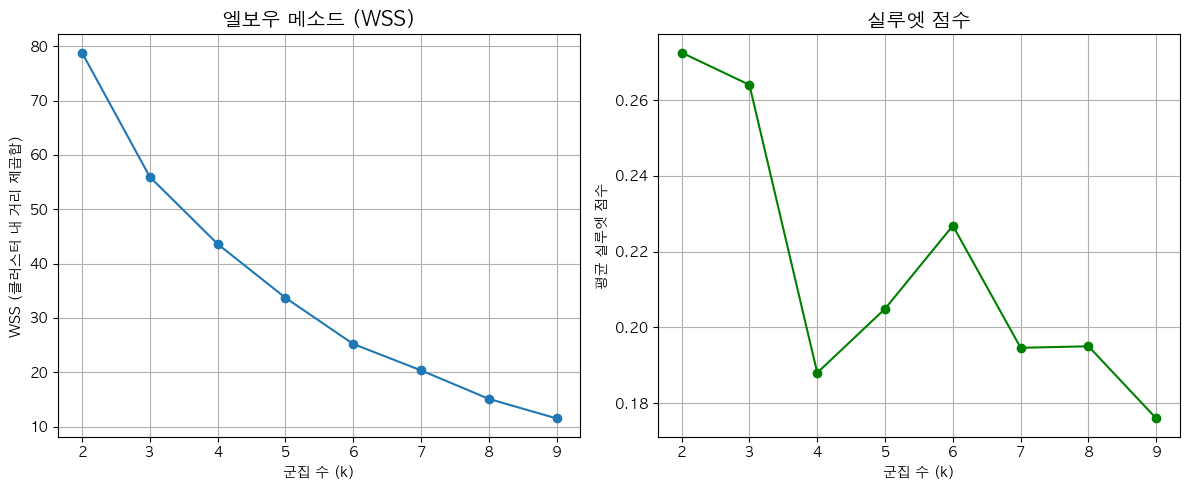

In [67]:
# 1. 군집 수 최적화: 엘보우 메소드 & 실루엣 점수 확인
wss = []  # Within-Cluster-Sum-of-Squares 저장
silhouette_scores = []  # 실루엣 점수 저장
K_range = range(2, 10)  # 군집 수 후보 (2~9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df[feature_cols])

    wss.append(kmeans.inertia_)  # inertia_ = 클러스터 내 제곱합
    silhouette = silhouette_score(scaled_df[feature_cols], labels)
    silhouette_scores.append(silhouette)

# 2. 엘보우 메소드 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wss, marker='o')
plt.title('엘보우 메소드 (WSS)', fontsize=14)
plt.xlabel('군집 수 (k)')
plt.ylabel('WSS (클러스터 내 거리 제곱합)')
plt.grid(True)

# 3. 실루엣 점수 시각화
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('실루엣 점수', fontsize=14)
plt.xlabel('군집 수 (k)')
plt.ylabel('평균 실루엣 점수')
plt.grid(True)

plt.tight_layout()
plt.show()

In [68]:
# 군집 수 설정
k = 3  

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_df[feature_cols])
scaled_df['클러스터'] = labels

# 숫자형 컬럼만 선택 (문자열 제외)
numeric_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns

# 클러스터별 평균값 계산
cluster_summary = scaled_df.groupby('클러스터')[numeric_cols].mean()
cluster_summary



,평균 상가 임대료,월_평균_소득_금액,출생현황(16~25),연령별 등록 인구 (0~9세),Cctv 개수,어린이집 개수,지하철역 개수,정류장 개수
클러스터,,,,,,,,
0,-0.709176,-0.477604,-0.040707,-0.282391,0.206025,0.062966,-4.767313e-01,-0.056770
1,0.994009,1.863545,1.356012,1.691920,-0.482438,0.850041,1.110223e-16,0.824656
2,1.133519,-0.430733,-1.233889,-0.844748,-0.135638,-1.038939,1.430194e+00,-0.654347


In [69]:
for i in range(k):
    print(f"\n클러스터 {i}번:")
    print(scaled_df[scaled_df['클러스터'] == i]['행정구역'].tolist())


클러스터 0번:
['구의1동', '구의2동', '군자동', '자양1동', '자양2동', '중곡1동', '중곡2동', '중곡3동', '중곡4동']

클러스터 1번:
['광장동', '구의3동', '자양3동']

클러스터 2번:
['능동', '자양4동', '화양동']


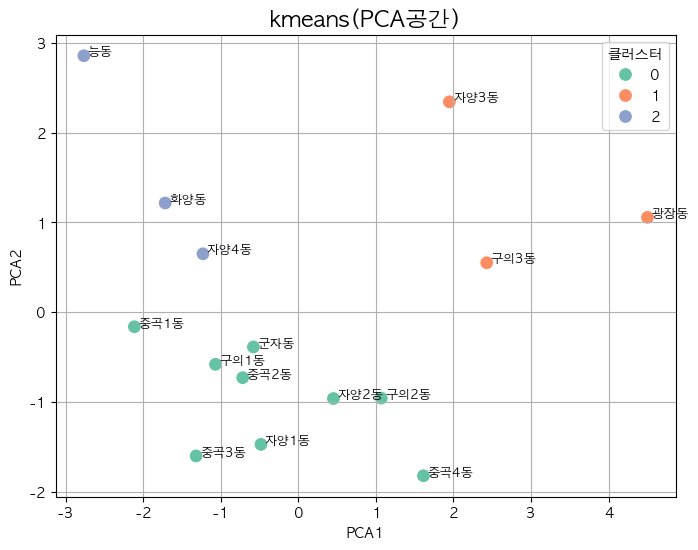

In [70]:
# PCA로 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[feature_cols])
scaled_df['PCA1'] = pca_result[:, 0]
scaled_df['PCA2'] = pca_result[:, 1]

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_df, x='PCA1', y='PCA2', hue='클러스터', palette='Set2', s=100)
for i in range(scaled_df.shape[0]):
    plt.text(scaled_df['PCA1'][i]+0.05, scaled_df['PCA2'][i], scaled_df['행정구역'][i], fontsize=9)
plt.title('kmeans(PCA공간)', fontsize=16)
plt.grid(True)
plt.show()


In [71]:
# 군집 수 설정
k = 6  

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_df[feature_cols])
scaled_df['클러스터'] = labels

# 숫자형 컬럼만 선택 (문자열 제외)
numeric_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns

# 클러스터별 평균값 계산
cluster_summary = scaled_df.groupby('클러스터')[numeric_cols].mean()
cluster_summary

,평균 상가 임대료,월_평균_소득_금액,출생현황(16~25),연령별 등록 인구 (0~9세),Cctv 개수,어린이집 개수,지하철역 개수,정류장 개수,PCA1,PCA2
클러스터,,,,,,,,,,
0,0.663813,-0.530780,-1.108175,-0.687191,0.627323,-0.330571,0.953463,-0.071709,-1.177590,0.493202
1,0.968730,1.406847,1.814916,1.239246,-0.625011,0.472245,0.238366,-0.004482,2.188043,1.446847
2,-1.014707,-0.580011,-0.346706,-0.562357,-0.511723,-0.519469,-0.762770,-0.421292,-1.141842,-0.909176
3,1.057492,-0.253875,-1.132751,-0.993215,-1.468893,-1.652857,2.383656,-1.416257,-2.768663,2.856877
4,-0.319140,-0.281454,0.707591,0.263605,1.197618,0.897265,-0.476731,0.421292,1.043968,-1.246845
5,1.044567,2.776940,0.438204,2.597266,-0.197291,1.605632,-0.476731,2.482932,4.502655,1.056239


In [72]:
for i in range(k):
    print(f"\n클러스터 {i}번:")
    print(scaled_df[scaled_df['클러스터'] == i]['행정구역'].tolist())



클러스터 0번:
['군자동', '자양4동', '화양동']

클러스터 1번:
['구의3동', '자양3동']

클러스터 2번:
['구의1동', '자양1동', '중곡1동', '중곡2동', '중곡3동']

클러스터 3번:
['능동']

클러스터 4번:
['구의2동', '자양2동', '중곡4동']

클러스터 5번:
['광장동']


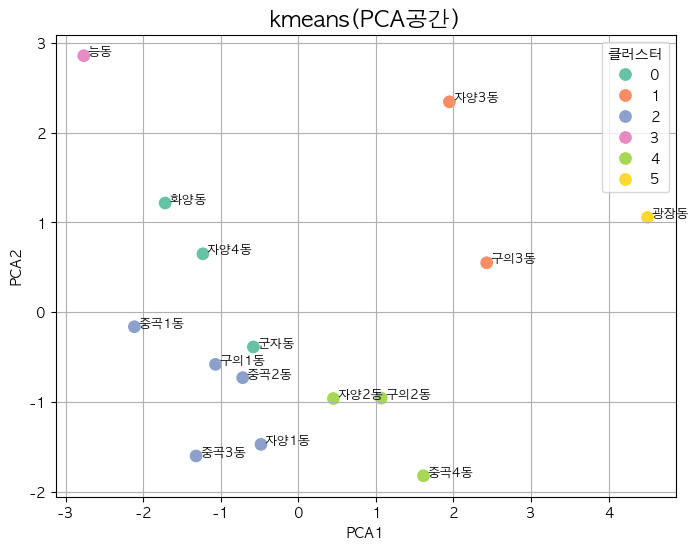

In [73]:
# PCA로 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[feature_cols])
scaled_df['PCA1'] = pca_result[:, 0]
scaled_df['PCA2'] = pca_result[:, 1]

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_df, x='PCA1', y='PCA2', hue='클러스터', palette='Set2', s=100)
for i in range(scaled_df.shape[0]):
    plt.text(scaled_df['PCA1'][i]+0.05, scaled_df['PCA2'][i], scaled_df['행정구역'][i], fontsize=9)
plt.title('kmeans(PCA공간)', fontsize=16)
plt.grid(True)
plt.show()
